#**Step 3: Attending to issues 1**

**Optimizing Hyperparameters**

The selected data to carry out our assessment and performance of the several machine learning issues, in our case hyperparameters is the Facebook (Meta)  stock data from yahoo finance.

# Importing libraries

In [1]:
try:
    import skopt
except ImportError:
    !pip install scikit-optimize

try:
    import tpot
except ImportError:
    !pip install tpot


import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from tpot import TPOTRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_iris, make_classification
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=23b0937172d173af39fae33df471e03c8df950dd3198768e6af07c1d25b4263f
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Importing the data, creating dataframes and running the algorithms

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Grid Search hyperparameter- MSE on Validation Set: 4721.841361203008
Random Search hyperparameter- MSE on Validation Set: 4817.468558657923
Bayesian Optimization hyperparameter - MSE on Validation Set: 4812.407296131729
Genetic Algorithms hyperparameter - MSE on Validation Set: 8236.471963806885
Best Model - MSE on Test Set: 11589.783797152691


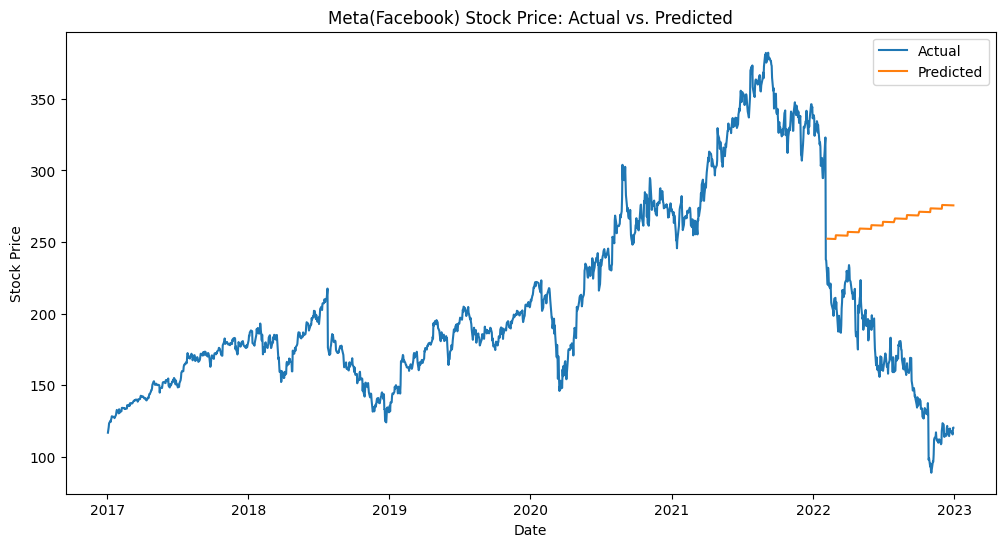

In [2]:





# Download Facebook/ meta stock data from Yahoo Finance
meta_df = yf.download('meta', start='2017-01-01', end='2022-12-31')

# Preparation of the dataset
meta_df['Date'] = meta_df.index
meta_df['Date'] = pd.to_datetime(meta_df['Date'])
meta_df['Year'] = meta_df['Date'].dt.year
meta_df['Month'] = meta_df['Date'].dt.month
meta_df['Day'] = meta_df['Date'].dt.day

# Definition of  features and target variable
features = ['Year', 'Month', 'Day']
target = 'Close'

X = meta_df[features]
y = meta_df[target]

# Preparation of validation and training set, Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Definition of the model using the Random forest regression model
model = RandomForestRegressor()

# Grid Search hyperparameter
grid_search = GridSearchCV(model, param_grid={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
grid_search.fit(X_train, y_train)
best_grid_model = grid_search.best_estimator_

# Random Search hyperparameter
random_search = RandomizedSearchCV(model, param_distributions={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_

# Bayesian Optimization hyperparameter
bayes_search = BayesSearchCV(model, {'n_estimators': Integer(50, 200), 'max_depth': Integer(3, 10)}, n_iter=10)
bayes_search.fit(X_train, y_train)
best_bayes_model = bayes_search.best_estimator_

# Genetic Algorithms hyperparameter
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=0)
tpot.fit(X_train, y_train)
best_genetic_model = tpot.fitted_pipeline_

# Evaluating the models performance using the validation set
y_val_pred_grid = best_grid_model.predict(X_val)
mse_grid_e = mean_squared_error(y_val, y_val_pred_grid)

y_val_pred_random = best_random_model.predict(X_val)
mse_random_e = mean_squared_error(y_val, y_val_pred_random)

y_val_pred_bayes = best_bayes_model.predict(X_val)
mse_bayes_e = mean_squared_error(y_val, y_val_pred_bayes)

y_val_pred_genetic = best_genetic_model.predict(X_val)
mse_genetic_e = mean_squared_error(y_val, y_val_pred_genetic)

print("Grid Search hyperparameter- MSE on Validation Set:", mse_grid_e)
print("Random Search hyperparameter- MSE on Validation Set:", mse_random_e)
print("Bayesian Optimization hyperparameter - MSE on Validation Set:", mse_bayes_e)
print("Genetic Algorithms hyperparameter - MSE on Validation Set:", mse_genetic_e)

# Model selection based on performance on the validation set and evaluation on the test set
best_model = best_genetic_model  # Select the best model based on the validation set performance

y_test_pred = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

print("Best Model - MSE on Test Set:", mse_test)

# Plotting the predicted values vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(meta_df.index, meta_df['Close'], label='Actual')
plt.plot(X_test.index, y_test_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Meta(Facebook) Stock Price: Actual vs. Predicted')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


Grid Search - MSE on Validation Set: 23192.170900784557
Random Search - MSE on Validation Set: 23243.7907874824
Bayesian Optimization - MSE on Validation Set: 23110.009494768306
Genetic Algorithms - MSE on Validation Set: 59813.078272326486


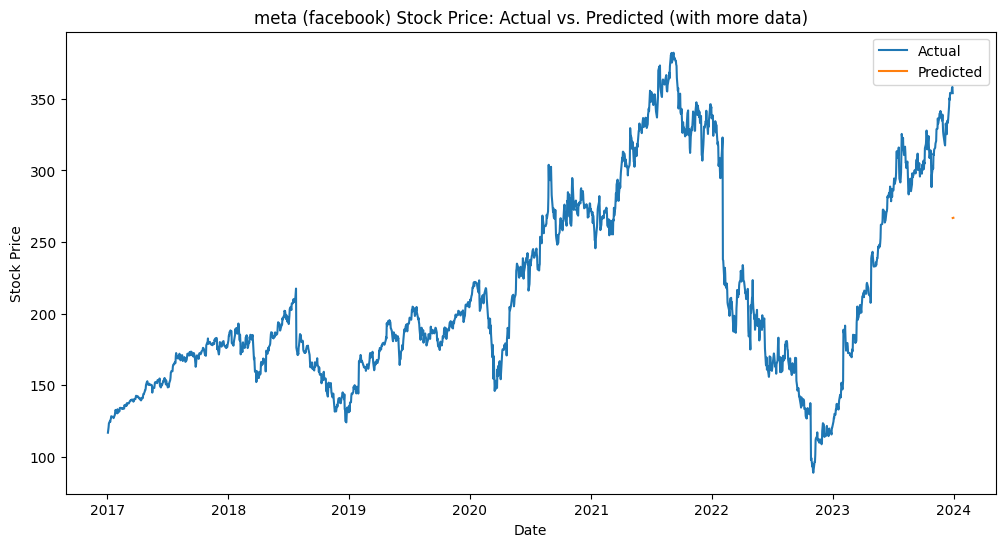

In [4]:
# Download Facebook/ meta stock data from Yahoo Finance
meta_df = yf.download('meta', start='2017-01-01', end='2023-12-31')

#  Preparation of the datasett
meta_df['Date'] = meta_df.index
meta_df['Date'] = pd.to_datetime(meta_df['Date'])
meta_df['Year'] = meta_df['Date'].dt.year
meta_df['Month'] = meta_df['Date'].dt.month
meta_df['Day'] = meta_df['Date'].dt.day

# Definition of  features and target variable
features = ['Year', 'Month', 'Day']
target = 'Close'

X = meta_df[features]
y = meta_df[target]

# Preparation of validation and training set, Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Definition of the model using the Random forest regression model
model = RandomForestRegressor()

# Grid Search
grid_search = GridSearchCV(model, param_grid={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
grid_search.fit(X_train, y_train)
best_grid_model = grid_search.best_estimator_

# Random Search
random_search = RandomizedSearchCV(model, param_distributions={'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]})
random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_

# Bayesian Optimization
bayes_search = BayesSearchCV(model, {'n_estimators': Integer(50, 200), 'max_depth': Integer(3, 10)}, n_iter=10)
bayes_search.fit(X_train, y_train)
best_bayes_model = bayes_search.best_estimator_

# Genetic Algorithms
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=0)
tpot.fit(X_train, y_train)
best_genetic_model = tpot.fitted_pipeline_

# Step 5: Evaluation of the models on the validation set
y_val_pred_grid = best_grid_model.predict(X_val)
mse_grid = mean_squared_error(y_val, y_val_pred_grid)

y_val_pred_random = best_random_model.predict(X_val)
mse_random = mean_squared_error(y_val, y_val_pred_random)

y_val_pred_bayes = best_bayes_model.predict(X_val)
mse_bayes = mean_squared_error(y_val, y_val_pred_bayes)

y_val_pred_genetic = best_genetic_model.predict(X_val)
mse_genetic = mean_squared_error(y_val, y_val_pred_genetic)

print("Grid Search - MSE on Validation Set:", mse_grid)
print("Random Search - MSE on Validation Set:", mse_random)
print("Bayesian Optimization - MSE on Validation Set:", mse_bayes)
print("Genetic Algorithms - MSE on Validation Set:", mse_genetic)

# Step 6: Selection of the best model based on performance on the validation set and evaluate on the test set
best_model = best_genetic_model  # Selecting the best model based on the validation set performance

# Extend the dataset for prediction to end of  2023 December
extended_dates = pd.date_range(start=meta_df['Date'].iloc[-1], end='2023-12-31')
extended_features = pd.DataFrame({'Date': extended_dates})
extended_features['Year'] = extended_features['Date'].dt.year
extended_features['Month'] = extended_features['Date'].dt.month
extended_features['Day'] = extended_features['Date'].dt.day

# Combination of the  original and extended features
combined_features = pd.concat([X, extended_features[features]], ignore_index=True)

# Fitting the selected best model on the combined dataset
best_model.fit(combined_features[:len(X)], y)

# Predicting the stock prices for the extended period up to december 2023
y_extended_pred = best_model.predict(combined_features[len(X):])

# Graphing the predicted values vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(meta_df.index, meta_df['Close'], label='Actual')
plt.plot(extended_features['Date'], y_extended_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('meta (facebook) Stock Price: Actual vs. Predicted (with more data)')
plt.legend()
plt.show()


It can be observed that after optimization our performance evaluation metrics even improved and there isn't much deviation between the predicted and the actual.